1 加载数据

In [1]:
import pandas as pd

In [2]:
# 加载数据
data = pd.read_csv("mtcars.csv")
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
''' 
model = 车型
mpg = 燃油效率
cyl = 气缸数
disp = 排量
hp = 马力
drat = 后桥传动比
wt = 重量
qsec = 1/4 英里时间
vs = 发动机 分类数据 0=V 形 1=直列
am = 变速器 分类数据 0=自动 1=手动
gear = 前进档数
carb = 化油器数量
'''

' \nmodel = 车型\nmpg = 燃油效率\ncyl = 气缸数\ndisp = 排量\nhp = 马力\ndrat = 后桥传动比\nwt = 重量\nqsec = 1/4 英里时间\nvs = 发动机 分类数据 0=V 形 1=直列\nam = 变速器 分类数据 0=自动 1=手动\ngear = 前进档数\ncarb = 化油器数量\n'

2 数据清洗，缺失值，异常值

In [4]:
# 数据描述
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [5]:
# 数据行列
data.shape

(32, 12)

In [6]:
# 每一列数据类型
data.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

In [7]:
# 查看缺失值
data.isnull().sum() # 统计每列有多少缺失值

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

3 查看数据

In [8]:
# 手动选择其中的数值变量
df =  data [[ 'mpg' , 'cyl' , 'disp' , 'hp' , 'drat' , 'wt' , 'qsec' , 'gear' , 'carb' ]]

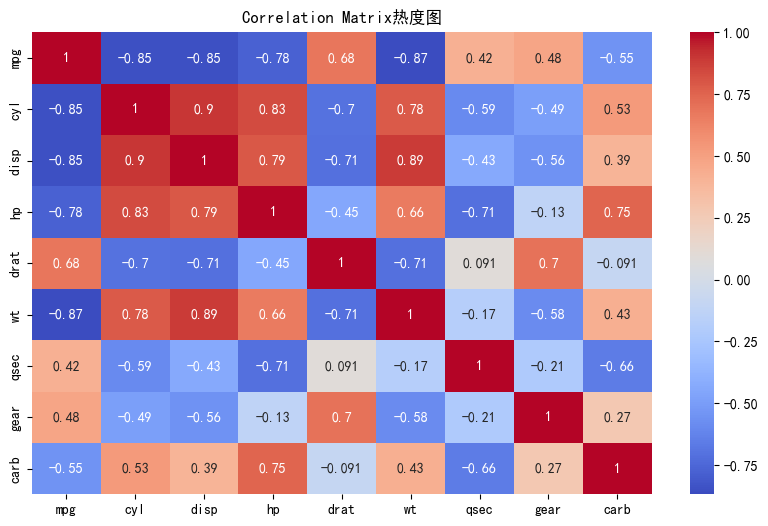

In [9]:
# 计算相关性
corr = df.corr()

# 热度图查看维度相关性
import seaborn as sns
import matplotlib.pyplot as plt 
# 设置中文字体显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix热度图')
plt.show()

In [10]:
'''  
肉眼分组
mpg gear qsec drat

cyl carb wt hp disp 

'''

'  \n肉眼分组\nmpg gear qsec drat\n\ncyl carb wt hp disp \n\n'

4 切分 x 输入特征

In [19]:
import numpy as np
x = data [[ 'mpg' , 'cyl' , 'disp' , 'hp' , 'drat' , 'wt' , 'qsec' , 'gear' , 'carb' ]]

5 归一化

In [20]:
# 方差均值归一化
# 归一化不会破坏相关性
from sklearn import preprocessing
mean_std_scaler = preprocessing.StandardScaler() # 缩放器
scale_x = mean_std_scaler.fit_transform(x) # 缩放
scale_x
x = pd.DataFrame(scale_x, columns=x.columns) # array -> dataframe
x.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
count,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01
mean,-4.996004e-16,2.775558e-17,1.665335e-16,0.000000,-3.053113e-16,-4.718448e-16,-1.471046e-15,-2.775558e-17,-2.775558e-17
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00
min,-1.633610e+00,-1.244457e+00,-1.308518e+00,-1.403130,-1.589643e+00,-1.769642e+00,-1.903996e+00,-9.467293e-01,-1.140108e+00
25%,-7.865141e-01,-1.244457e+00,-9.008917e-01,-0.743705,-9.815764e-01,-6.604034e-01,-5.436944e-01,-9.467293e-01,-5.110827e-01
50%,-1.501383e-01,-1.066677e-01,-2.821771e-01,-0.351014,1.870518e-01,1.118844e-01,-7.888899e-02,4.303315e-01,-5.110827e-01
75%,4.567366e-01,1.031121e+00,7.810529e-01,0.493642,6.145986e-01,4.078199e-01,5.977084e-01,4.303315e-01,7.469671e-01
max,2.327934e+00,1.031121e+00,1.977904e+00,2.790515,2.533809e+00,2.291423e+00,2.871986e+00,1.807392e+00,3.263067e+00


6 计算最佳k值

In [21]:
# 计算有多少个k，方法1
# 手肘法wcss
'''
紧凑度 = 内质心距离平方和 
越小越紧凑
当减少速度变慢时，就是最佳k值

'''
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0,n_init=10,max_iter=300)
    kmeans.fit(scale_x)
    wcss.append(kmeans.inertia_)
print(wcss)

[288.00000000000006, 147.3745936029324, 104.46614022799787, 83.30713792524853, 64.34941555073905, 52.2479467124911, 43.55279345542321, 35.591419109373525, 29.18353706888785, 24.448901439133262]


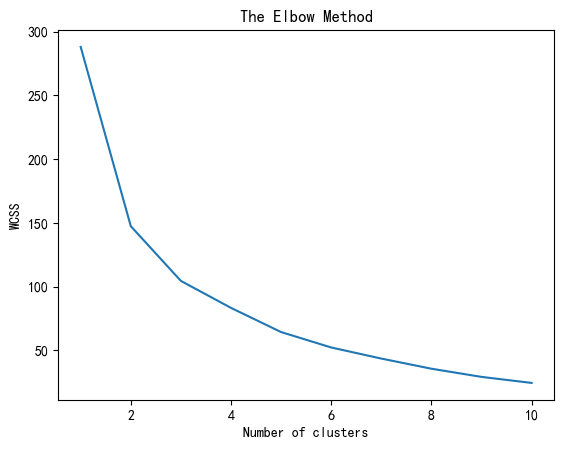

In [22]:
# 画图
import matplotlib.pyplot as plt
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
# 计算有多少个k，方法2
# 轮廓分数
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9 ,10]
silhouette_scores = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scale_x)

    silhouette_avg = silhouette_score(scale_x, cluster_labels)
    silhouette_scores.append(silhouette_avg)
print(silhouette_scores)

[np.float64(0.4043677132530762), np.float64(0.30313432361731474), np.float64(0.34944678869735746), np.float64(0.36630554697210704), np.float64(0.3505744176632166), np.float64(0.3426262724153288), np.float64(0.3747492619356986), np.float64(0.3946550170132239), np.float64(0.40605654916129386)]


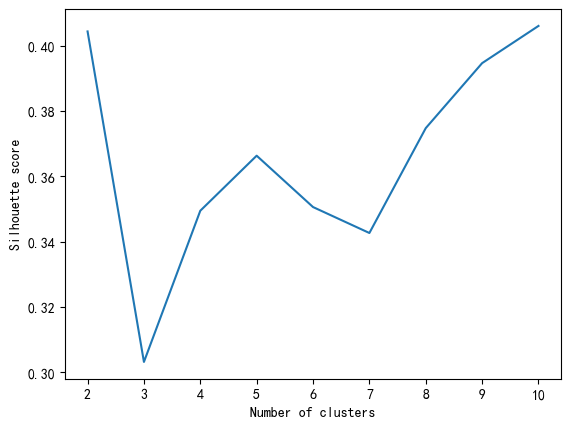

In [24]:
# 画图
plt.plot(range_n_clusters, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

7 层次聚类

In [25]:
from  scipy.cluster.hierarchy  import  dendrogram ,  linkage

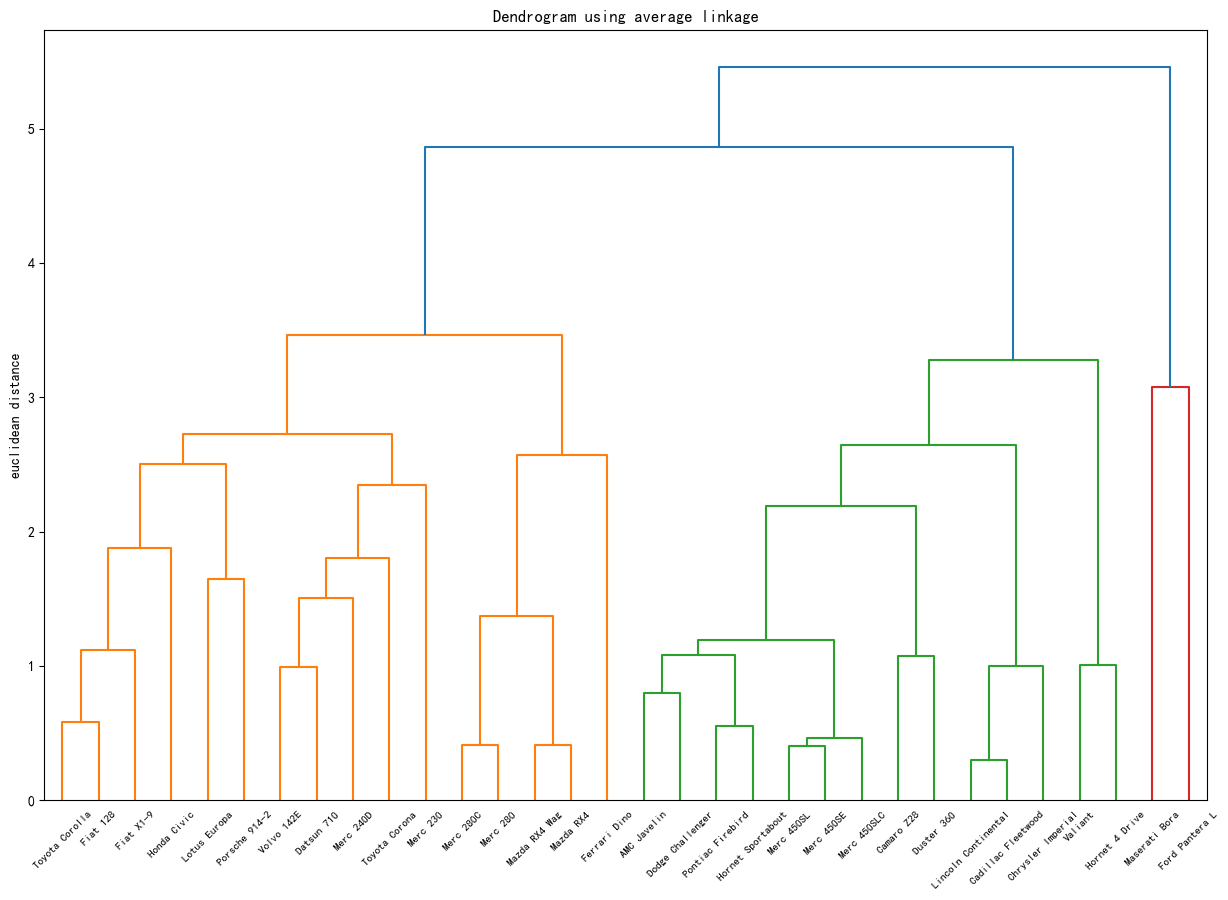

In [26]:
# average平均连接
linked  =  linkage ( scale_x ,  'average' ) # 后边的是链接类型,平均链接

plt.figure(figsize=(15,10))
dendrogram(linked,orientation='top',labels=np.array(data['model']),distance_sort='descending')

plt.ylabel('euclidean distance')
plt.title('Dendrogram using average linkage')
plt.show()
# 可以结合手肘法发现最有意义的分类方式

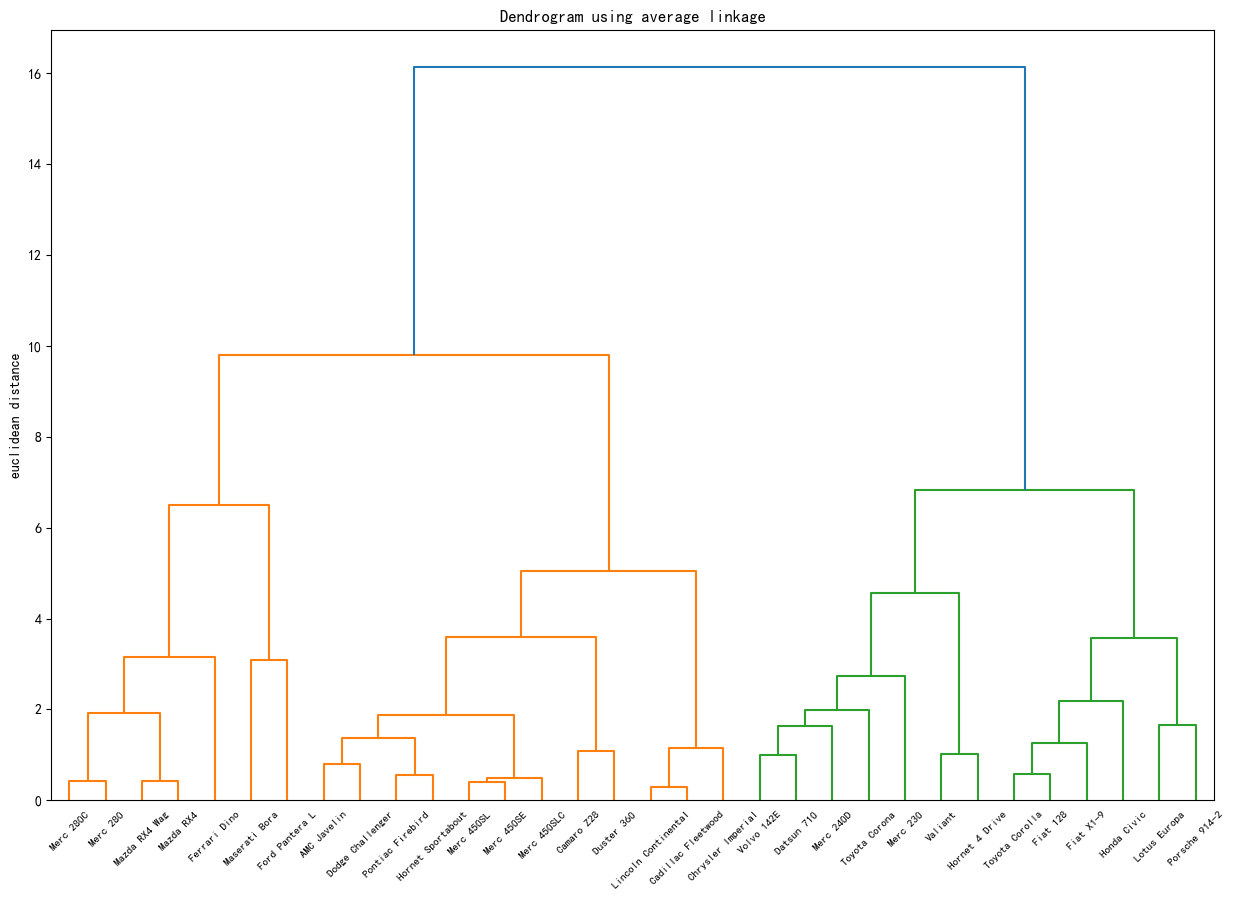

In [27]:
# ward链接
linked  =  linkage ( scale_x ,  'ward' ) # 后边的是链接类型,ward链接

plt.figure(figsize=(15,10))
dendrogram(linked,orientation='top',labels=np.array(data['model']),distance_sort='descending')

plt.ylabel('euclidean distance')
plt.title('Dendrogram using average linkage')
plt.show()
# 可以结合手肘法发现最有意义的分类方式